**Notebook 3  Daily Returns, Expected Returns, and Annualized Covariance Matrix: Validated, Visualized, and Stored!**

In [1]:
#importing the data
import pandas as pd



daily_return = pd.read_csv("../Data/daily_returns.csv",index_col="Date")
daily_return

,HDFCBANK.NS,ICICIBANK.NS,INFY.NS,RELIANCE.NS,TCS.NS
Date,,,,,
2020-06-04,-0.020103,-0.025221,0.008838,0.024746,0.022188
2020-06-05,0.031596,0.026879,-0.005934,0.001203,-0.020702
2020-06-08,-0.016887,0.007279,0.024590,-0.007713,0.011473
2020-06-09,-0.028152,-0.031267,-0.004509,-0.020612,0.000145
2020-06-10,0.004609,0.012767,-0.002439,0.022769,0.017712
...,...,...,...,...,...
2025-05-28,-0.001454,0.005116,0.001083,-0.006469,-0.000286
2025-05-29,0.002080,0.001857,0.008780,0.003468,0.000114
2025-05-30,0.009027,-0.007346,-0.000576,0.002186,-0.009920


In [2]:
#calculating the mean daily returns and annualizing them
meanDailyReturns = daily_return.mean()
meanAnnualReturns = meanDailyReturns*252
meanAnnualReturns = meanAnnualReturns.to_frame(name="Mean Annual Return")
print(meanAnnualReturns)

              Mean Annual Return
HDFCBANK.NS             0.163487
ICICIBANK.NS            0.320461
INFY.NS                 0.214204
RELIANCE.NS             0.170274
TCS.NS                  0.146823


In [3]:
#calculating the covariance matrix of daily returns and annualizing it
daily_covmatrix = daily_return.cov()
annual_covmatrix = daily_covmatrix * 252
print(annual_covmatrix)


daily_return.var()*252

              HDFCBANK.NS  ICICIBANK.NS   INFY.NS  RELIANCE.NS    TCS.NS
HDFCBANK.NS      0.053002      0.031753  0.014150     0.019199  0.010358
ICICIBANK.NS     0.031753      0.063636  0.015490     0.019863  0.009892
INFY.NS          0.014150      0.015490  0.063522     0.015212  0.037672
RELIANCE.NS      0.019199      0.019863  0.015212     0.060917  0.014723
TCS.NS           0.010358      0.009892  0.037672     0.014723  0.047443


HDFCBANK.NS     0.053002
ICICIBANK.NS    0.063636
INFY.NS         0.063522
RELIANCE.NS     0.060917
TCS.NS          0.047443
dtype: float64

In [4]:
#saving the results to csv files
annual_covmatrix.to_csv("../Reports/cov_matrix.csv")
meanAnnualReturns.to_csv("../Reports/expected_returns.csv")

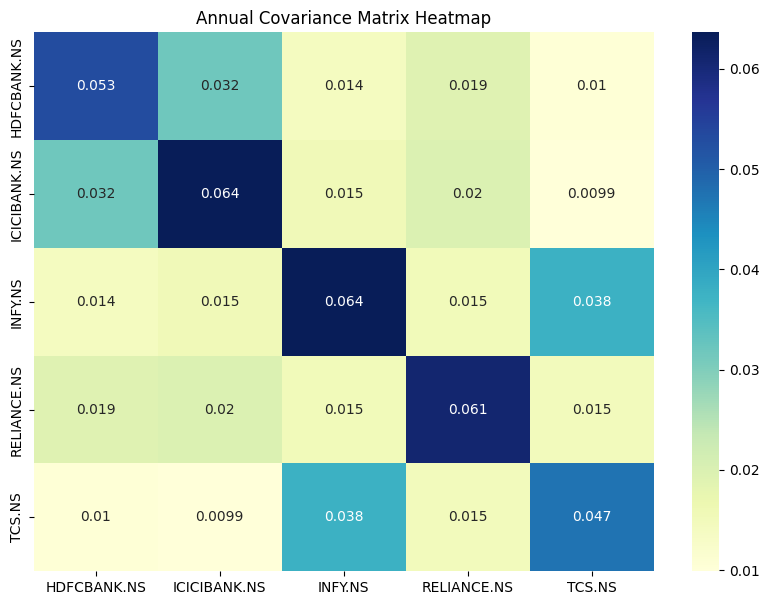

In [5]:
# Visualizing the annual covariance matrix using a heatmap
import seaborn as sb
import matplotlib.pyplot as plt

# Create a heatmap of the annual covariance matrix
plt.figure(figsize=(10,7))
sb.heatmap(annual_covmatrix, annot=True, cmap="YlGnBu")  # annot=True shows values, cmap sets the color
plt.title("Annual Covariance Matrix Heatmap")
plt.savefig("../Reports/Charts/Annual_Cov_Matrix_Heatmap.png", dpi=600)
plt.show()